In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data=pd.read_csv('houseprice.csv')
data

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
0,1.982,1.0,3,2.00,133,0,14.2212
1,1.676,1.5,3,0.38,14,1,13.4865
2,1.694,2.0,3,0.96,15,1,11.8007
3,1.800,1.0,2,0.48,49,1,13.8297
4,2.088,1.0,3,1.84,29,1,12.9470
...,...,...,...,...,...,...,...
1042,1.802,2.0,4,0.97,56,1,10.7695
1043,3.239,3.5,4,2.50,1,1,23.6737
1044,1.440,2.0,2,0.61,66,1,15.4829
1045,2.030,2.5,3,1.00,3,1,17.9492


In [4]:
data.describe()

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,1.807303,1.918338,3.183381,0.569580,28.061127,0.593123,16.386213
std,0.641461,0.641735,0.750265,0.777879,34.900899,0.491486,6.765156
min,0.672000,1.000000,1.000000,0.000000,0.000000,0.000000,1.685800
25%,1.336000,1.500000,3.000000,0.210000,6.000000,0.000000,11.201400
50%,1.672000,2.000000,3.000000,0.390000,18.000000,1.000000,15.191700
75%,2.206000,2.500000,4.000000,0.600000,34.000000,1.000000,20.523500
max,4.534000,4.500000,6.000000,9.000000,247.000000,1.000000,44.643600


In [5]:
data.isnull()

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1042,False,False,False,False,False,False,False
1043,False,False,False,False,False,False,False
1044,False,False,False,False,False,False,False
1045,False,False,False,False,False,False,False


In [19]:
df=data.sample(frac=1).reset_index(drop=True)
df

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
0,1.890,2.0,4,0.69,30,1,15.1950
1,1.982,1.0,3,2.00,133,0,14.2212
2,1.056,1.0,2,9.00,5,0,14.6611
3,1.480,1.5,3,0.07,22,0,10.8785
4,1.248,2.0,3,1.00,14,0,12.0476
...,...,...,...,...,...,...,...
1042,1.406,1.5,2,0.16,19,0,9.8632
1043,2.712,2.5,4,0.50,1,0,22.0261
1044,2.058,2.5,3,0.31,1,1,22.0765
1045,1.332,1.5,3,0.86,9,1,15.5855


array([[<Axes: title={'center': 'Living Area'}>,
        <Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'Bedrooms'}>],
       [<Axes: title={'center': 'Lot Size'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fireplace'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

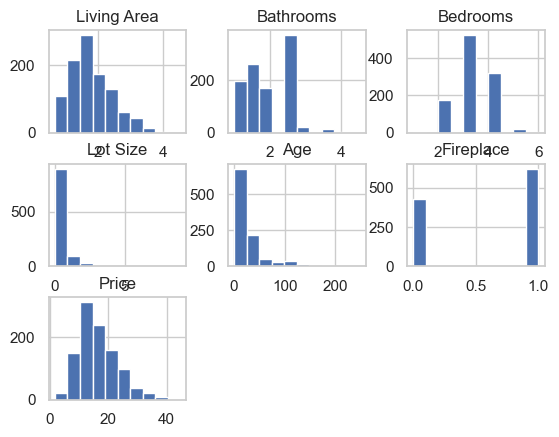

In [20]:
pd.DataFrame.hist(df)

C:\Users\Rajesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


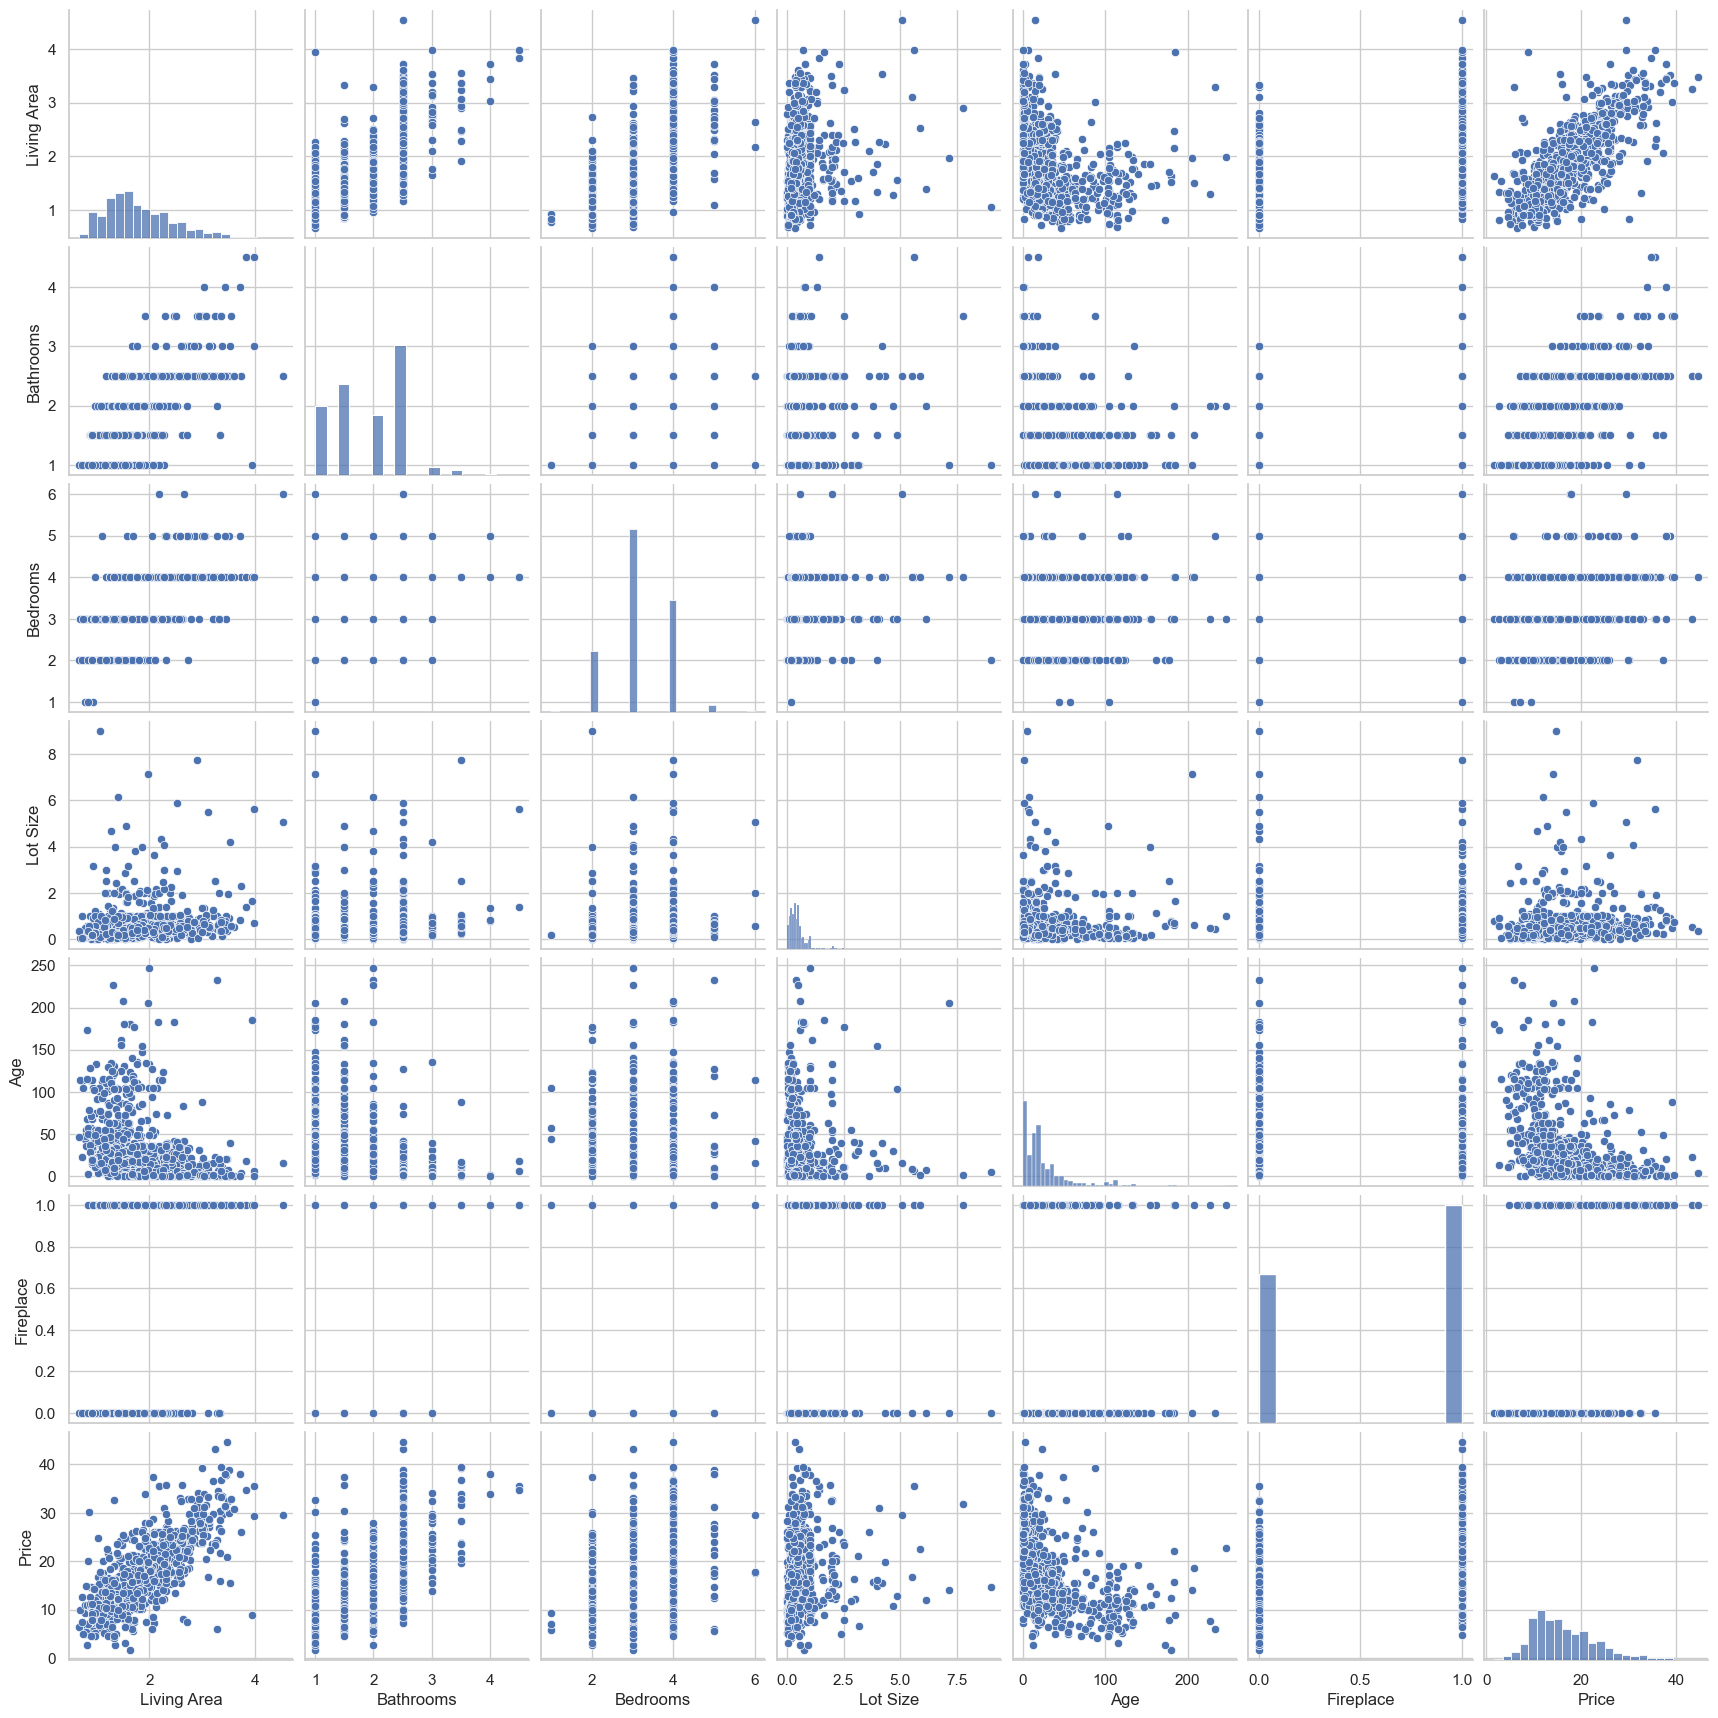

In [21]:
import seaborn as sns
sns.pairplot(df)

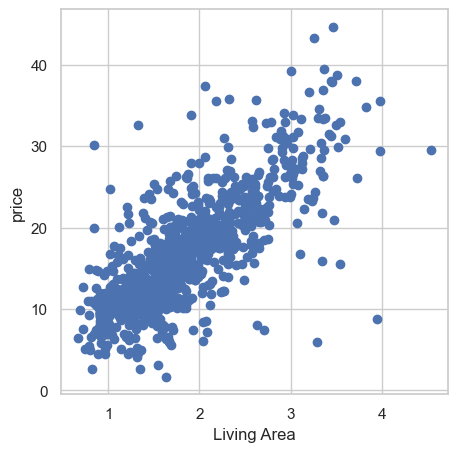

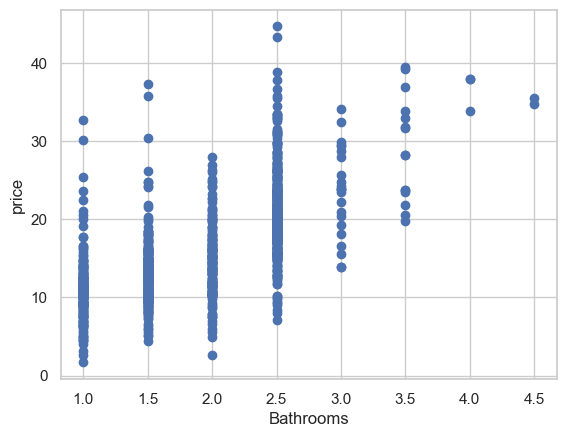

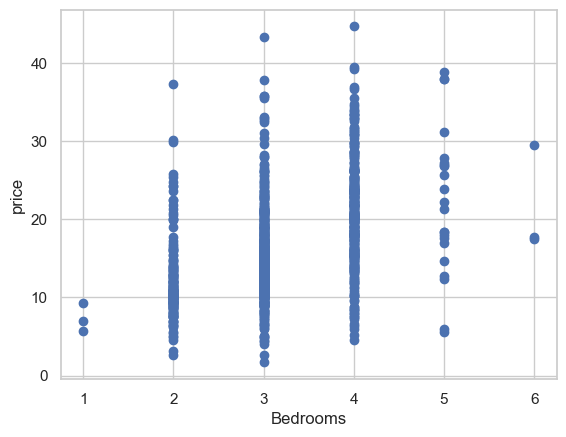

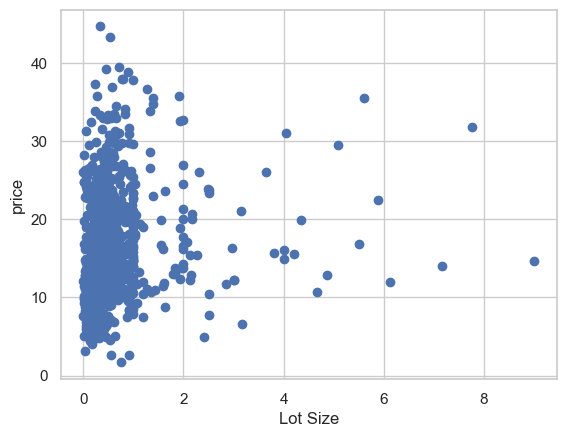

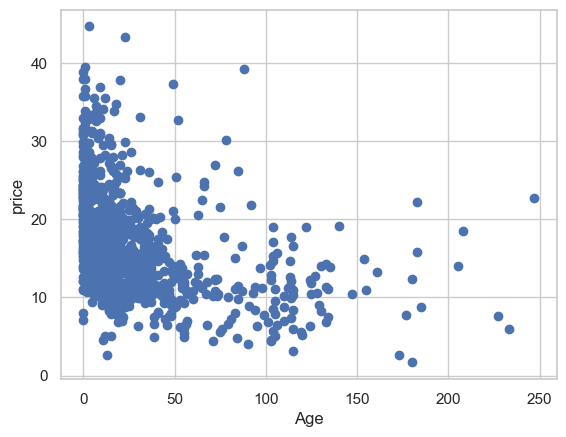

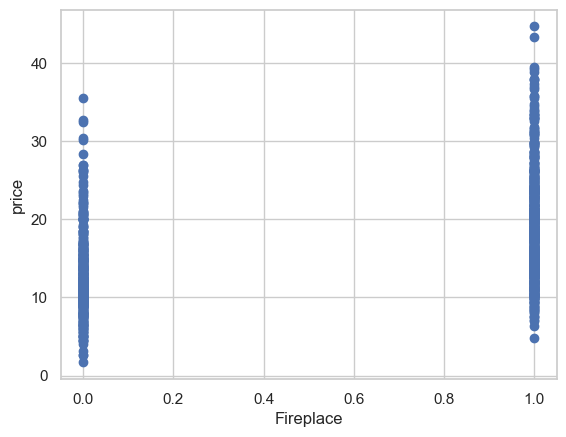

In [22]:
import seaborn as sns
sns.set(style='whitegrid')
plt.figure(figsize=(5,5))
for columns in df.columns:
    if(columns!='Price'):
        plt.scatter(df[columns],df['Price'],label=columns)
        plt.xlabel(columns)
        plt.ylabel("price")
        plt.show()

In [23]:
df.drop('Lot Size',inplace=True,axis=1)

In [24]:
df['Price']=df['Price']*100
df

,Living Area,Bathrooms,Bedrooms,Age,Fireplace,Price
0,1.890,2.0,4,30,1,1519.50
1,1.982,1.0,3,133,0,1422.12
2,1.056,1.0,2,5,0,1466.11
3,1.480,1.5,3,22,0,1087.85
4,1.248,2.0,3,14,0,1204.76
...,...,...,...,...,...,...
1042,1.406,1.5,2,19,0,986.32
1043,2.712,2.5,4,1,0,2202.61
1044,2.058,2.5,3,1,1,2207.65
1045,1.332,1.5,3,9,1,1558.55


In [25]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_tr_sc=sc.fit_transform(x_train)
x_te_Sc=sc.transform(x_test)



In [28]:
from sklearn import linear_model

In [29]:
reg=linear_model.LinearRegression()
reg.fit(x_tr_sc,y_train)

LinearRegression()

In [30]:
y_pred=reg.predict(x_te_Sc)

In [31]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print(f"R-squared (R2 ): {R2}")

R-squared (R2 ): 0.6446154492912037
